# Proyecto 1: Analítica computacional para la toma de decisiones
Carolina Rodríguez

Gabriela Martínez

Wilmar Calderón

Tarea 2: Alistamiento de Datos

In [22]:
#Importation of all the relevant Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
#Reading of the comma delimited text
df=pd.read_csv('.\\data.txt')

In [24]:
#Preliminary view of the data (top 5 registers)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [25]:
#Statistical description of all the variables
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [26]:
## Study to determine if there are duplicates or null values.
    # no. of duplicates 
duplicates = len(df[df.duplicated()])
    # no of missing values
missing_values = df.isnull().sum().sum()

## Review of the varibles types.
# Data types in dataset
types = df.dtypes.value_counts()

In [27]:
#Print of the results: definition of duplicate numbers, missing values, number of registers and features (rows x columns)
print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(df.shape[1]))
print('Number of Registers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Duplicate Entries: 0
Number of Missing Values: 506
Number of Features: 15
Number of Registers: 1197
Data Types and Frequency in Dataset:
float64    6
int64      5
object     4
Name: count, dtype: int64


In [28]:
#Identification of the column that has null values
cols=df.columns.values
for col in cols:
    if (df[col].isnull().sum()>0):
        print(col)

wip


*wip:* Trabajo en progreso. Incluye la cantidad de elementos sin terminar.

In [29]:
#Indexation of the rows where wip is null and the incentive is 0. Incentive>0 for wip==null identified as outliers
dropable=df[(df['wip'].isnull()) & (df['incentive']>0)]
print(dropable.index.values)
#Dropping of the rows with outlier
df_fin=df
df_fin.iloc[dropable.index.values,8]=df.iloc[dropable.index.values,9]
df_fin.iloc[dropable.index.values,9]=0

print(df.tail(60))
#modification of null to 0 in the wip. From the variable characteristic, as it relates to the missing products to be finished, 
#an empty value would be considered as 0.
df_fin['wip'].fillna(0, inplace=True)

[1128 1129 1130 1133 1137 1138 1139 1143 1148 1149]
           date   quarter department        day  team  targeted_productivity  \
1137   3/9/2015  Quarter2  finishing     Monday     3                   0.80   
1138   3/9/2015  Quarter2  finishing     Monday     4                   0.75   
1139   3/9/2015  Quarter2  finishing     Monday     1                   0.75   
1140   3/9/2015  Quarter2     sweing     Monday     9                   0.75   
1141   3/9/2015  Quarter2     sweing     Monday     2                   0.70   
1142   3/9/2015  Quarter2     sweing     Monday    10                   0.70   
1143   3/9/2015  Quarter2  finishing     Monday     2                   0.70   
1144   3/9/2015  Quarter2     sweing     Monday     6                   0.65   
1145   3/9/2015  Quarter2     sweing     Monday     8                   0.65   
1146   3/9/2015  Quarter2     sweing     Monday     5                   0.60   
1147   3/9/2015  Quarter2     sweing     Monday     7               

C:\Users\gabby\AppData\Local\Temp\ipykernel_6260\356734850.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fin['wip'].fillna(0, inplace=True)


In [30]:
# review for no of missing values
missing_values = df_fin.isnull().sum().sum()
print('Number of Missing Values: %d'%(missing_values))

Number of Missing Values: 0


In [31]:
#Update of the datatypes of the dataframe. Date: datetime, no_of_workers: int, department is cleared from any space to avoid multiple categories.
df_fin['date']= pd.to_datetime(df_fin['date'])
df_fin['no_of_workers']=df_fin['no_of_workers'].astype(int)
df_fin['department'] = df_fin['department'].str.strip()

In [32]:
#Print details of the variables
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Tarea 3: Exploración de Datos

In [33]:
#description of the loaded data (null values eliminated)
df_fin.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,687.228070,4579.991646,25.679198,0.730159,0.369256,0.150376,34.551378,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1514.582341,3335.480597,30.375119,12.709757,3.268987,0.427848,22.152559,0.174488


['targeted_productivity' 'smv' 'wip' 'over_time' 'incentive' 'idle_time'
 'idle_men' 'no_of_style_change' 'no_of_workers' 'actual_productivity']


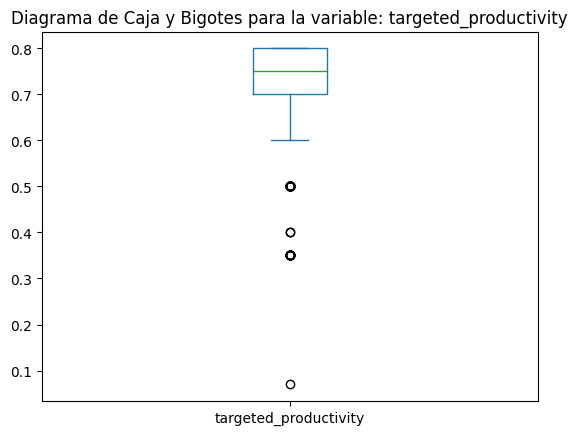

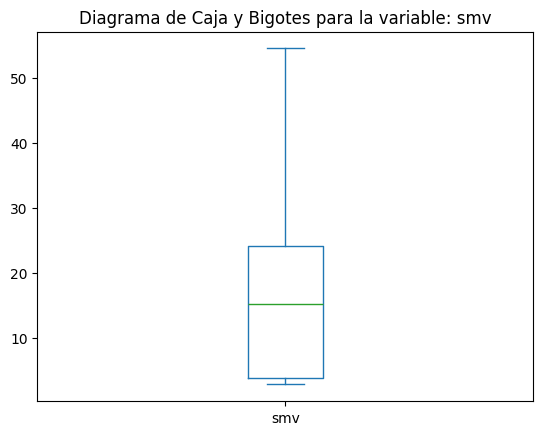

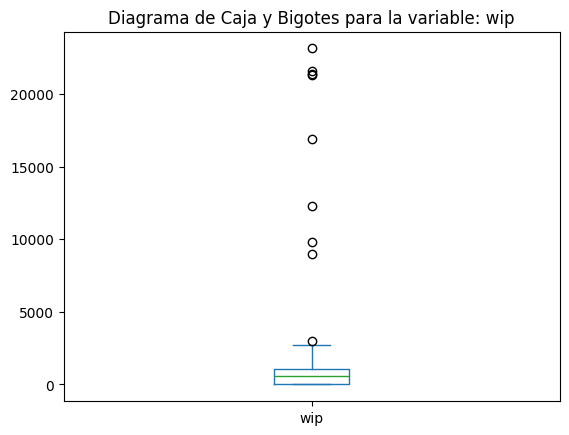

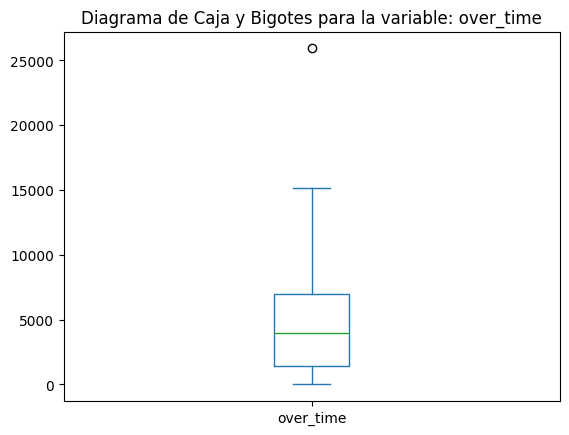

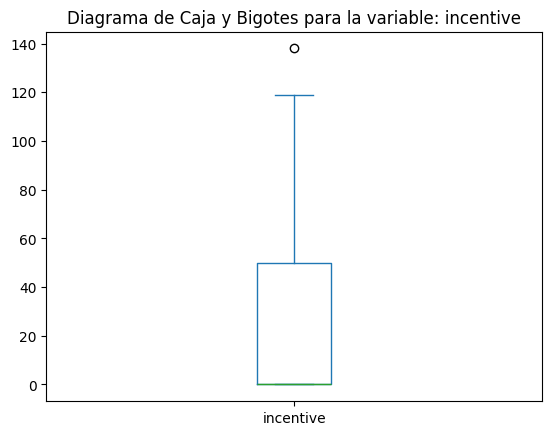

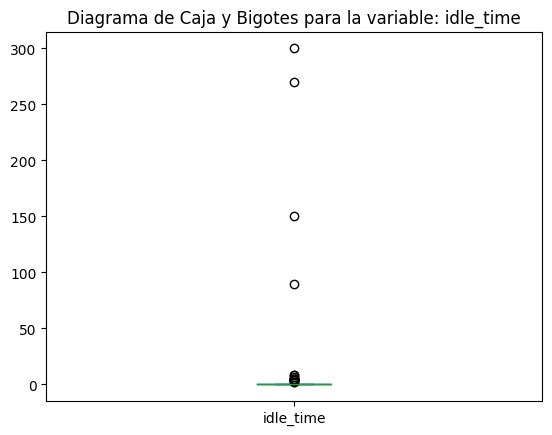

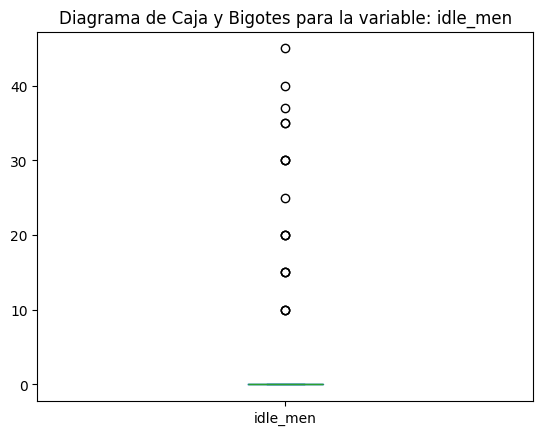

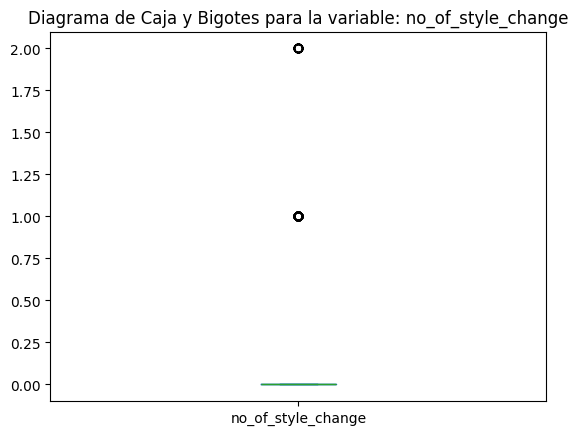

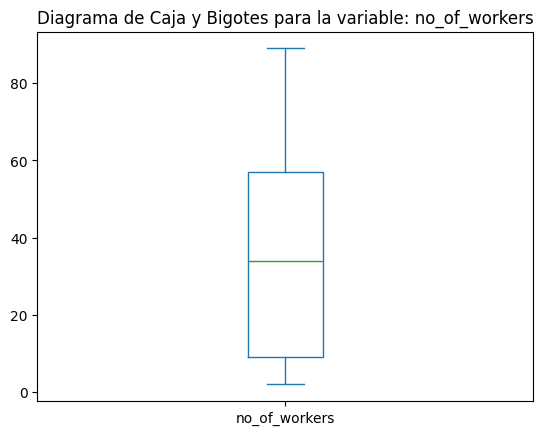

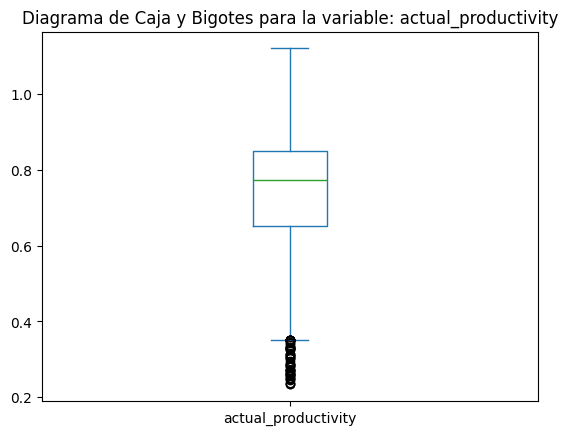

In [34]:
#creation of the box-whiskers plots for the numerical variables.
cols=df_fin.columns.values
cols=np.delete(cols,[0,1,2,3,4])
print(cols)
for col in cols:
    plt.figure()
    df_fin[col].plot(kind="box")
    plt.title("Diagrama de Caja y Bigotes para la variable: "+col)

In [35]:
#Groupby the date (day) to understand how different variables changes during time
daily_data=df_fin.groupby("date")

<Axes: xlabel='date'>

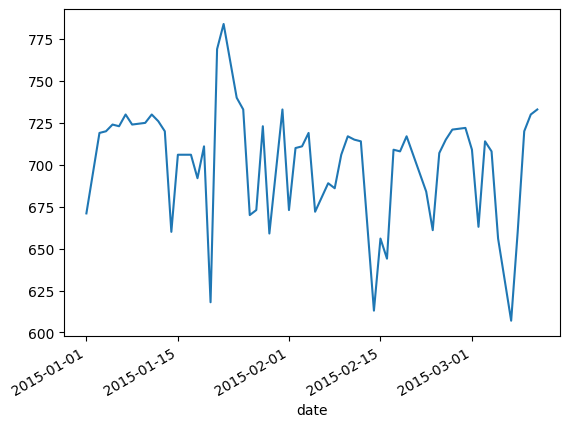

In [36]:
#review of quantity of workers during the time lapse studied
no_of_work=daily_data.sum()['no_of_workers']
no_of_work.plot()

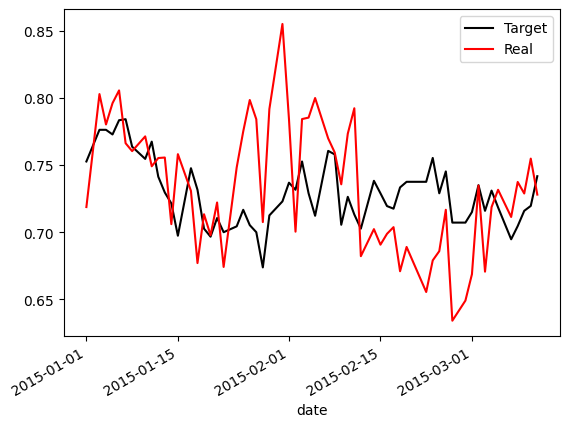

In [37]:
#comparisson between the targeted and the real productivity in the dates studied
target_eff=daily_data['targeted_productivity'].mean()
real_eff=daily_data['actual_productivity'].mean()
plt.figure()
target_eff.plot(c="black", label="Target")
real_eff.plot(c="red", label="Real")
plt.legend()
plt.show()

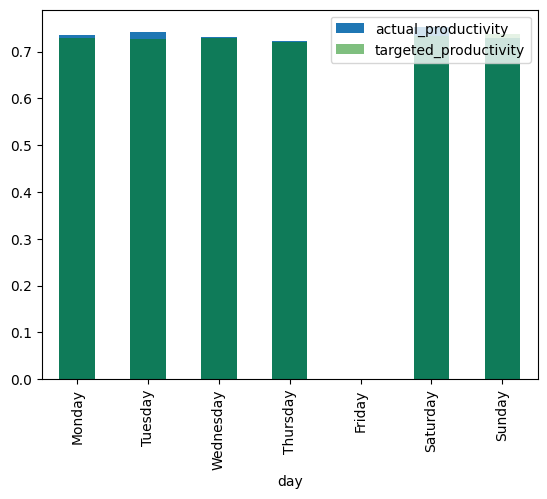

In [38]:
#Review of efficiencies during the week days (average efficiencies)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_data=df_fin.groupby("day")
real_eff_w=weekly_data['actual_productivity'].mean().reindex(cats)
target_eff_w=weekly_data['targeted_productivity'].mean().reindex(cats)

plt.figure()
real_eff_w.plot(kind="bar")
target_eff_w.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of activities performed')

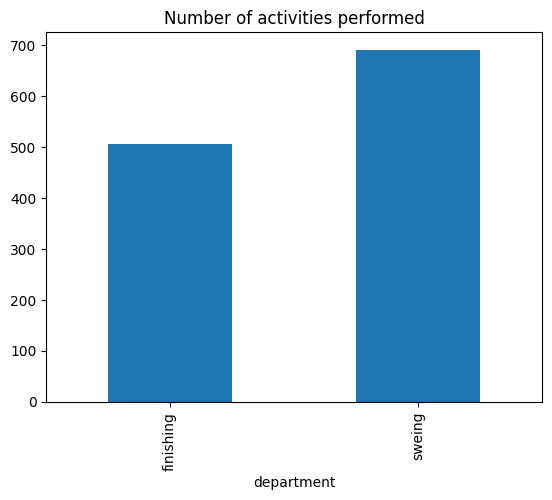

In [39]:
#comparisson of registers from the different activities performed
tasks=df_fin.groupby("department").count()

plt.figure()
tasks["team"].plot(kind="bar")
plt.title("Number of activities performed")

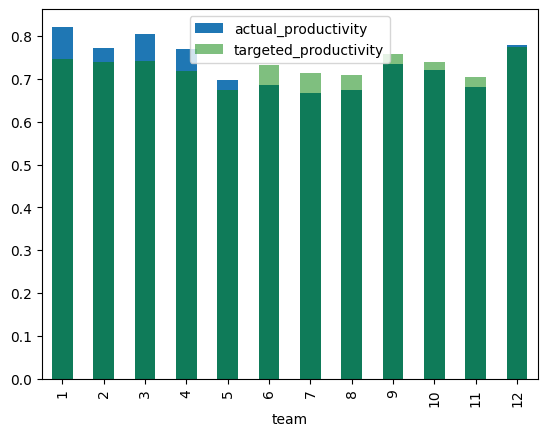

In [40]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['actual_productivity'].mean()
target_eff_t=team_data['targeted_productivity'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
target_eff_t.plot(kind="bar",color="green",alpha=0.5)
plt.legend()
plt.show()

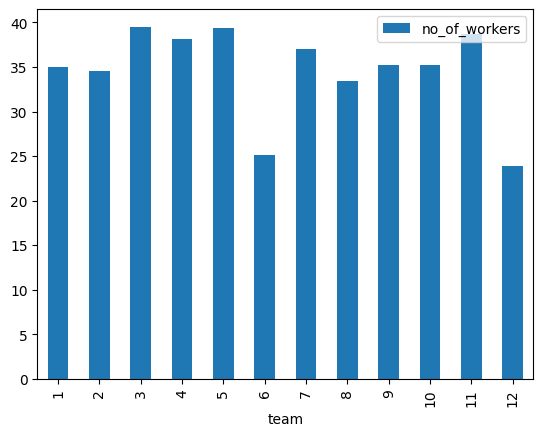

In [41]:
#Review of efficiencies during the week days (average efficiencies)

team_data=df_fin.groupby("team")
real_eff_t=team_data['no_of_workers'].mean()

plt.figure()
real_eff_t.plot(kind="bar")
plt.legend()
plt.show()

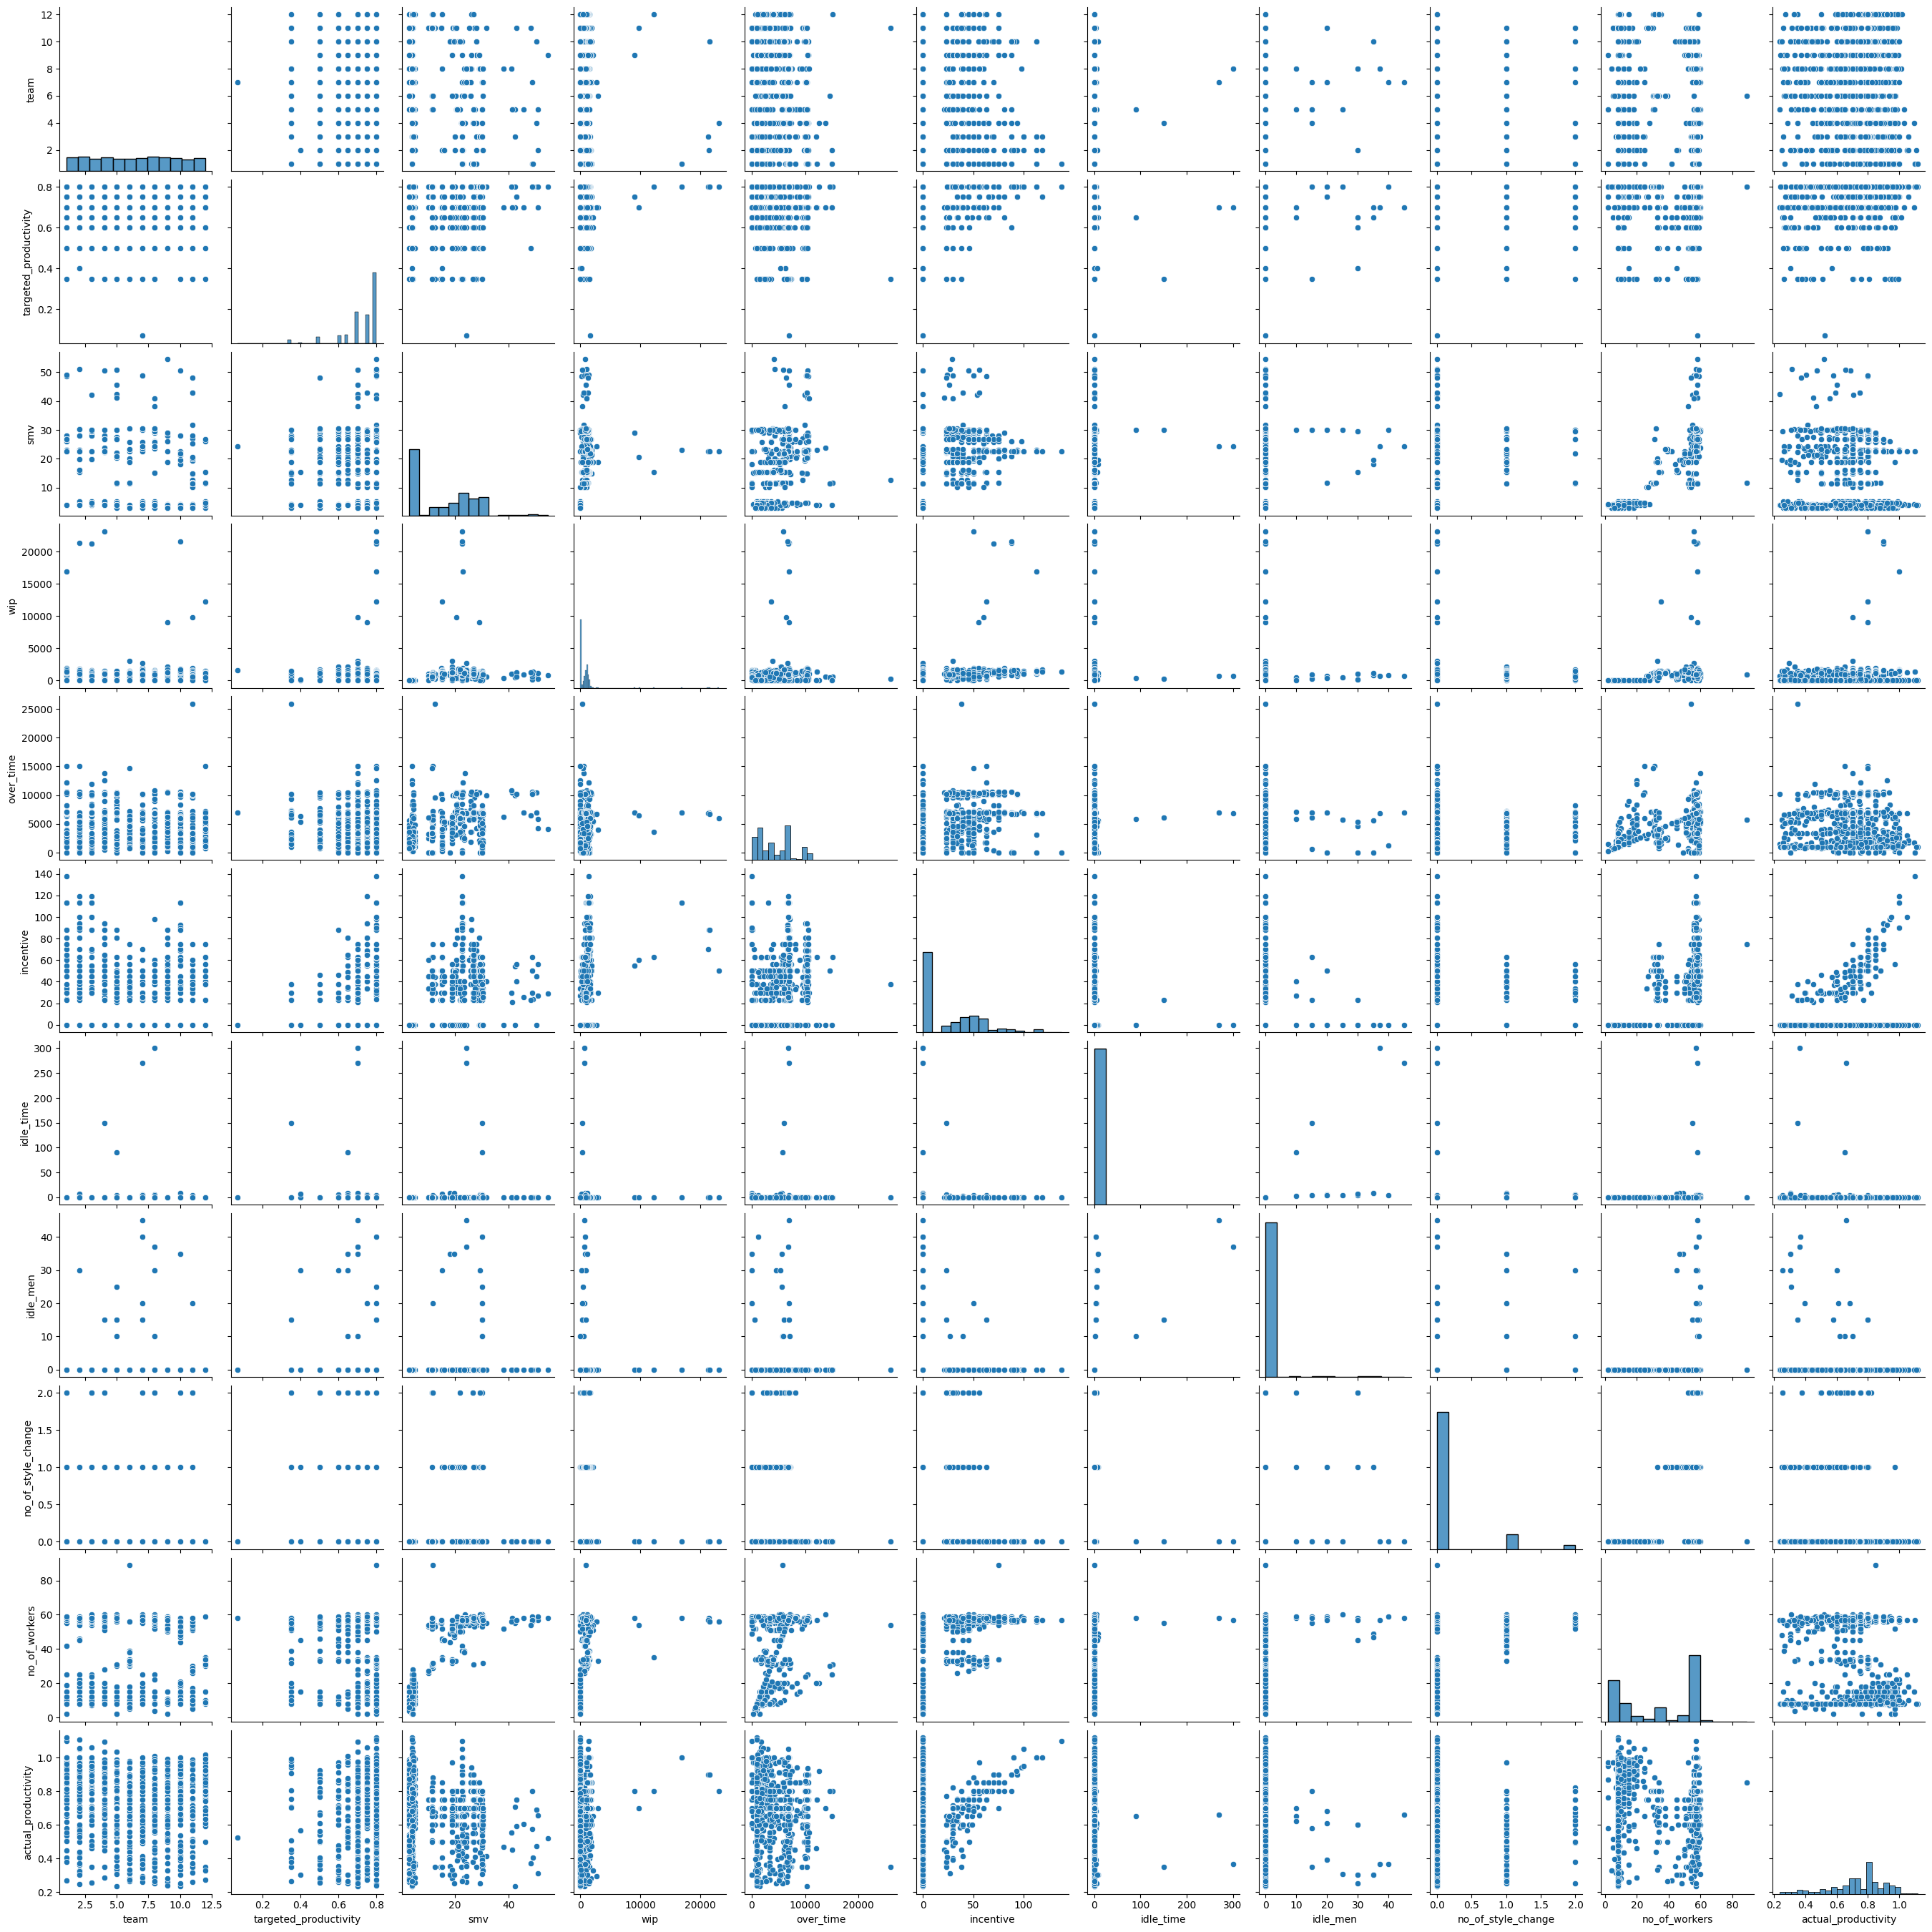

In [42]:
import seaborn as sns
df_val=df_fin.select_dtypes(exclude=['object'])
sns.pairplot(df_val)

<Axes: >

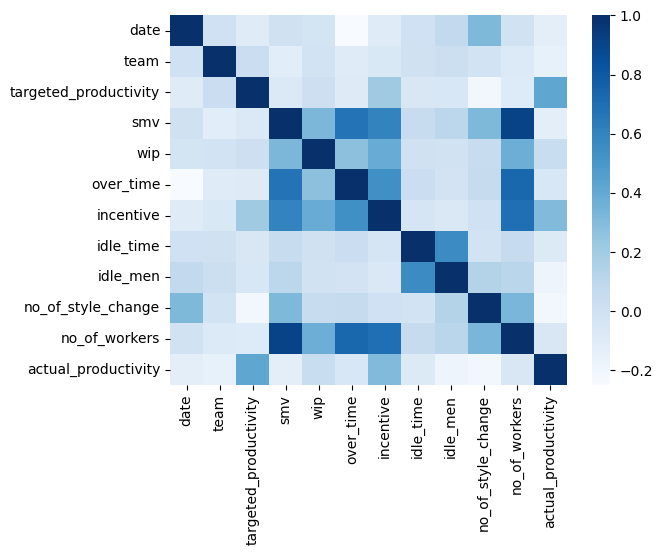

In [107]:
import seaborn as sb
corr = df_val.corr()

sb.heatmap(corr, cmap="Blues")

In [47]:
#CORRELACIÓN NO OF WORKERS VS ACTUAL PRODUCTIVITY

from scipy.stats import pearsonr
x=df["no_of_workers"]
y=(df["actual_productivity"])
# Calculate the correlation coefficient
correlation, p_value = pearsonr(x, y)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)
# Interpretation
if p_value < 0.05:  # Assuming a significance level of 0.05
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation coefficient: -0.058736421020068486
p-value: 0.042176389365666096
The correlation is statistically significant.


In [48]:
#CORRELACIÓN TEAM VS ACTUAL PRODUCTIVITY

from scipy.stats import pearsonr
x=df["team"]
y=(df["actual_productivity"])
# Calculate the correlation coefficient
correlation, p_value = pearsonr(x, y)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)
# Interpretation
if p_value < 0.05:  # Assuming a significance level of 0.05
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation coefficient: -0.14875331064277691
p-value: 2.3417931360686175e-07
The correlation is statistically significant.


In [59]:
#CORRELACION ENTRE VARIABLES INDEPENDIENTES
import numpy as np

# Calculate correlation matrix
correlation_matrix = np.corrcoef(df['team'],df['no_of_workers'])

# Calculate condition number
condition_number = np.linalg.cond(correlation_matrix)

# Print the condition number
print(condition_number)


1.1615909472948196


In [63]:
import statsmodels.api as sm
# Define las variables
y = df['actual_productivity']
X = df[['team','no_of_workers','incentive','over_time','smv']]

# Crea el modelo de correlación múltiple
model = sm.OLS(y, X).fit()

# Obtén el resumen del modelo
summary = model.summary()

# Imprime los coeficientes de correlación
print(summary.tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
team              0.0551      0.002     27.947      0.000       0.051       0.059
no_of_workers     0.0054      0.001      4.318      0.000       0.003       0.008
incentive         0.0022      0.000      4.835      0.000       0.001       0.003
over_time      1.932e-05   4.23e-06      4.564      0.000     1.1e-05    2.76e-05
smv              -0.0039      0.002     -1.784      0.075      -0.008       0.000


In [118]:
# nombres de características
features = ['incentive']

# dataframe de características
X = df[features]

X.head()

,incentive
0,98
1,0
2,50
3,50
4,50


In [117]:
X.shape

(1197, 1)

In [119]:
# variable de respuesta
y = df['actual_productivity']

y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [120]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(897, 1)
(897,)
(300, 1)
(300,)


In [123]:
print(X.head())
print(X_train.head())

   incentive
0         98
1          0
2         50
3         50
4         50
     incentive
684         45
581        113
175         75
946         50
742          0


In [124]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [125]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

0.6886674236997576
[0.00185841]


In [126]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('incentive', 0.001858410816605032)]

In [127]:
y_pred = linreg.predict(X_test)

In [128]:
from sklearn import metrics

In [129]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [130]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.1319884405731539
MSE:  0.030770188222508696
RMSE:  0.1754143330019206


In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Preparar los datos
X = df[['incentive','targeted_productivity','team', 'smv']]
y = df['actual_productivity']

# Crear variables dummy para team
X = pd.get_dummies(X, columns=['team'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal múltiple
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) del modelo de regresión lineal: {mse:.4f}")

# Modelo de regresión logística
# Convertir actual_productivity en una variable binaria (0 = baja productividad, 1 = alta productividad)
y_binary_train = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_train]
y_binary_test = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_test]

# Modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_binary_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_binary_test, y_pred)
print(f"Precisión del modelo de regresión logística: {accuracy:.4f}")

Error cuadrático medio (MSE) del modelo de regresión lineal: 0.0184
Precisión del modelo de regresión logística: 0.9917


In [166]:
# Crear variables dummy para team
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['team']])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['team']))
X = pd.concat([X, X_encoded], axis=1)
X = X.drop('team', axis=1)

# Preparar los datos
X = df[['incentive','targeted_productivity','team', 'smv']]
y = df['actual_productivity']

# Crear característica de interacción entre incentive y team
X['incentive_team'] = X['incentive'] * X[X_encoded.columns]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal múltiple
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) del modelo de regresión lineal: {mse:.4f}")

# Modelo de regresión logística
# Convertir actual_productivity en una variable binaria (0 = baja productividad, 1 = alta productividad)
y_binary_train = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_train]
y_binary_test = ["alta" if value > 1 else "target" if value == 1 else "baja" for value in y_test]

# Modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_binary_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_binary_test, y_pred)
print(f"Precisión del modelo de regresión logística: {accuracy:.4f}")

NameError: name 'OneHotEncoder' is not defined